## Introduction to SMS Spam Classification

With the proliferation of mobile devices and the widespread use of Short Message Service (SMS), the issue of spam messages has become a significant concern. SMS spam, also known as unsolicited text messages, can be annoying and potentially harmful. To address this problem, machine learning techniques are often employed to develop AI models that can automatically classify SMS messages as either spam or legitimate. This enables users to filter out unwanted messages and enhance their communication experience.

The goal of SMS spam classification is to create a predictive model that can distinguish between genuine messages and spam messages with a high level of accuracy. This involves the application of natural language processing (NLP) techniques and machine learning algorithms to process and analyze the text content of SMS messages.

### Importing important packages

In [1]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re


import warnings
warnings.filterwarnings("ignore")

## Unzipping file

In [2]:
# Specify the path to the zip file and the destination directory for extraction
zip_file_path = 'Archive.zip'
extracted_folder_path = 'dataset'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print("Extraction complete!")

Extraction complete!


### Loading data

In [3]:
df= pd.read_csv('dataset/Spam.csv', encoding= 'Latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data cleaning and preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
#renaming columns
df.rename(columns={'v1': 'cat', 'v2': 'text'}, inplace=True)

In [10]:
df.head()

,cat,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['cat'] = df['cat'].map({'ham': 0, 'spam': 1})

In [12]:
df.head()

,cat,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

cat     0
text    0
dtype: int64

In [14]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print the duplicated rows
duplicates.value_counts()

False    5169
True      403
dtype: int64

In [15]:
#droppind duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.shape


(5169, 2)

In [17]:
df['cat'].dtype

dtype('int64')

In [18]:
df['cat'].value_counts()

0    4516
1     653
Name: cat, dtype: int64

### Word cloud

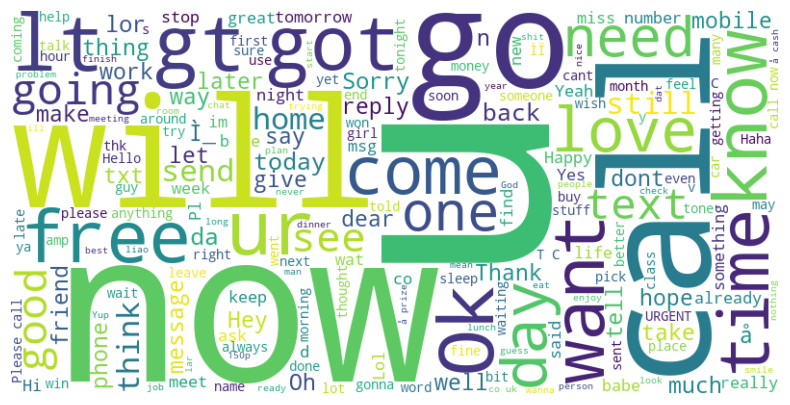

In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all text into a single string
all_text = ' '.join(df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


### Text_preprocessing

In [20]:
def process_text(text):
    text= text.lower().replace('\n',' ').replace('\r','').strip()
    text= re.sub(' +',' ',text)
    text= re.sub(r'[^\w\s]','',text)
    
    stop_words= set(stopwords.words("english"))
    word_tokens= word_tokenize(text)
    filtered_sentence= [w for w in word_tokens if not w in stop_words]
    
    text=' '.join(filtered_sentence)
    return text

In [21]:
df['text_parsed']=df['text'].apply(process_text)
df.head()

,cat,text,text_parsed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [22]:
x = df['text_parsed']
y = df['cat'].astype(int)

## Splitting the data into training and testing

In [23]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load your DataFrame

# Prepare data
X = df['text_parsed']
y = df['cat']

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




### standard scaling

In [24]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## modelling

In [25]:
classifiers = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC())
]

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classifier:')
    print(f'Accuracy: {accuracy:.2f}')
    print(report)
    print('-' * 40)


Naive Bayes Classifier:
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       889
           1       1.00      0.71      0.83       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034

----------------------------------------
Logistic Regression Classifier:
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       889
           1       0.92      0.59      0.72       145

    accuracy                           0.94      1034
   macro avg       0.93      0.79      0.84      1034
weighted avg       0.93      0.94      0.93      1034

----------------------------------------
SVM Classifier:
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.77     

From the metrics, you can observe how each classifier is performing on the spam classification task. In your case:

The Naive Bayes classifier has a high accuracy and good precision for class 0, but its recall for class 1 is relatively lower, suggesting it might miss some spam messages.
The Logistic Regression classifier has a slightly lower accuracy and precision for class 1, indicating it might have some difficulty correctly classifying spam messages.
The SVM classifier has a high accuracy and precision for class 0, and its recall for class 1 is better compared to the other classifiers.

In [26]:

from sklearn.model_selection import cross_val_score



# Initialize classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression()
svm_classifier = SVC()

classifiers = [
    ('Naive Bayes', nb_classifier),
    ('Logistic Regression', lr_classifier),
    ('SVM', svm_classifier)
]

# Perform cross-validation for each classifier
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X_tfidf, y, cv=5, scoring='accuracy')
    print(f'{name} Classifier:')
    print('Cross-validation scores:', scores)
    print('Average accuracy:', scores.mean())
    print('-' * 40)


Naive Bayes Classifier:
Cross-validation scores: [0.96421663 0.94777563 0.95551257 0.95647969 0.95062924]
Average accuracy: 0.9549227522698718
----------------------------------------
Logistic Regression Classifier:
Cross-validation scores: [0.95261122 0.92940039 0.94294004 0.9410058  0.93901258]
Average accuracy: 0.940994006302651
----------------------------------------
SVM Classifier:
Cross-validation scores: [0.97388781 0.95647969 0.96131528 0.95938104 0.96224589]
Average accuracy: 0.9626619431113674
----------------------------------------


Naive Bayes Classifier: The average accuracy across the folds is approximately 0.955, which suggests that the model is performing consistently and reasonably well on the cross-validation sets.

Logistic Regression Classifier: The average accuracy is around 0.941, indicating that this model is also performing well but slightly less accurately than Naive Bayes and SVM.

SVM Classifier: The average accuracy is approximately 0.963, making it the best-performing classifier in terms of average accuracy.